# week 13

## 5/28

In [1]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

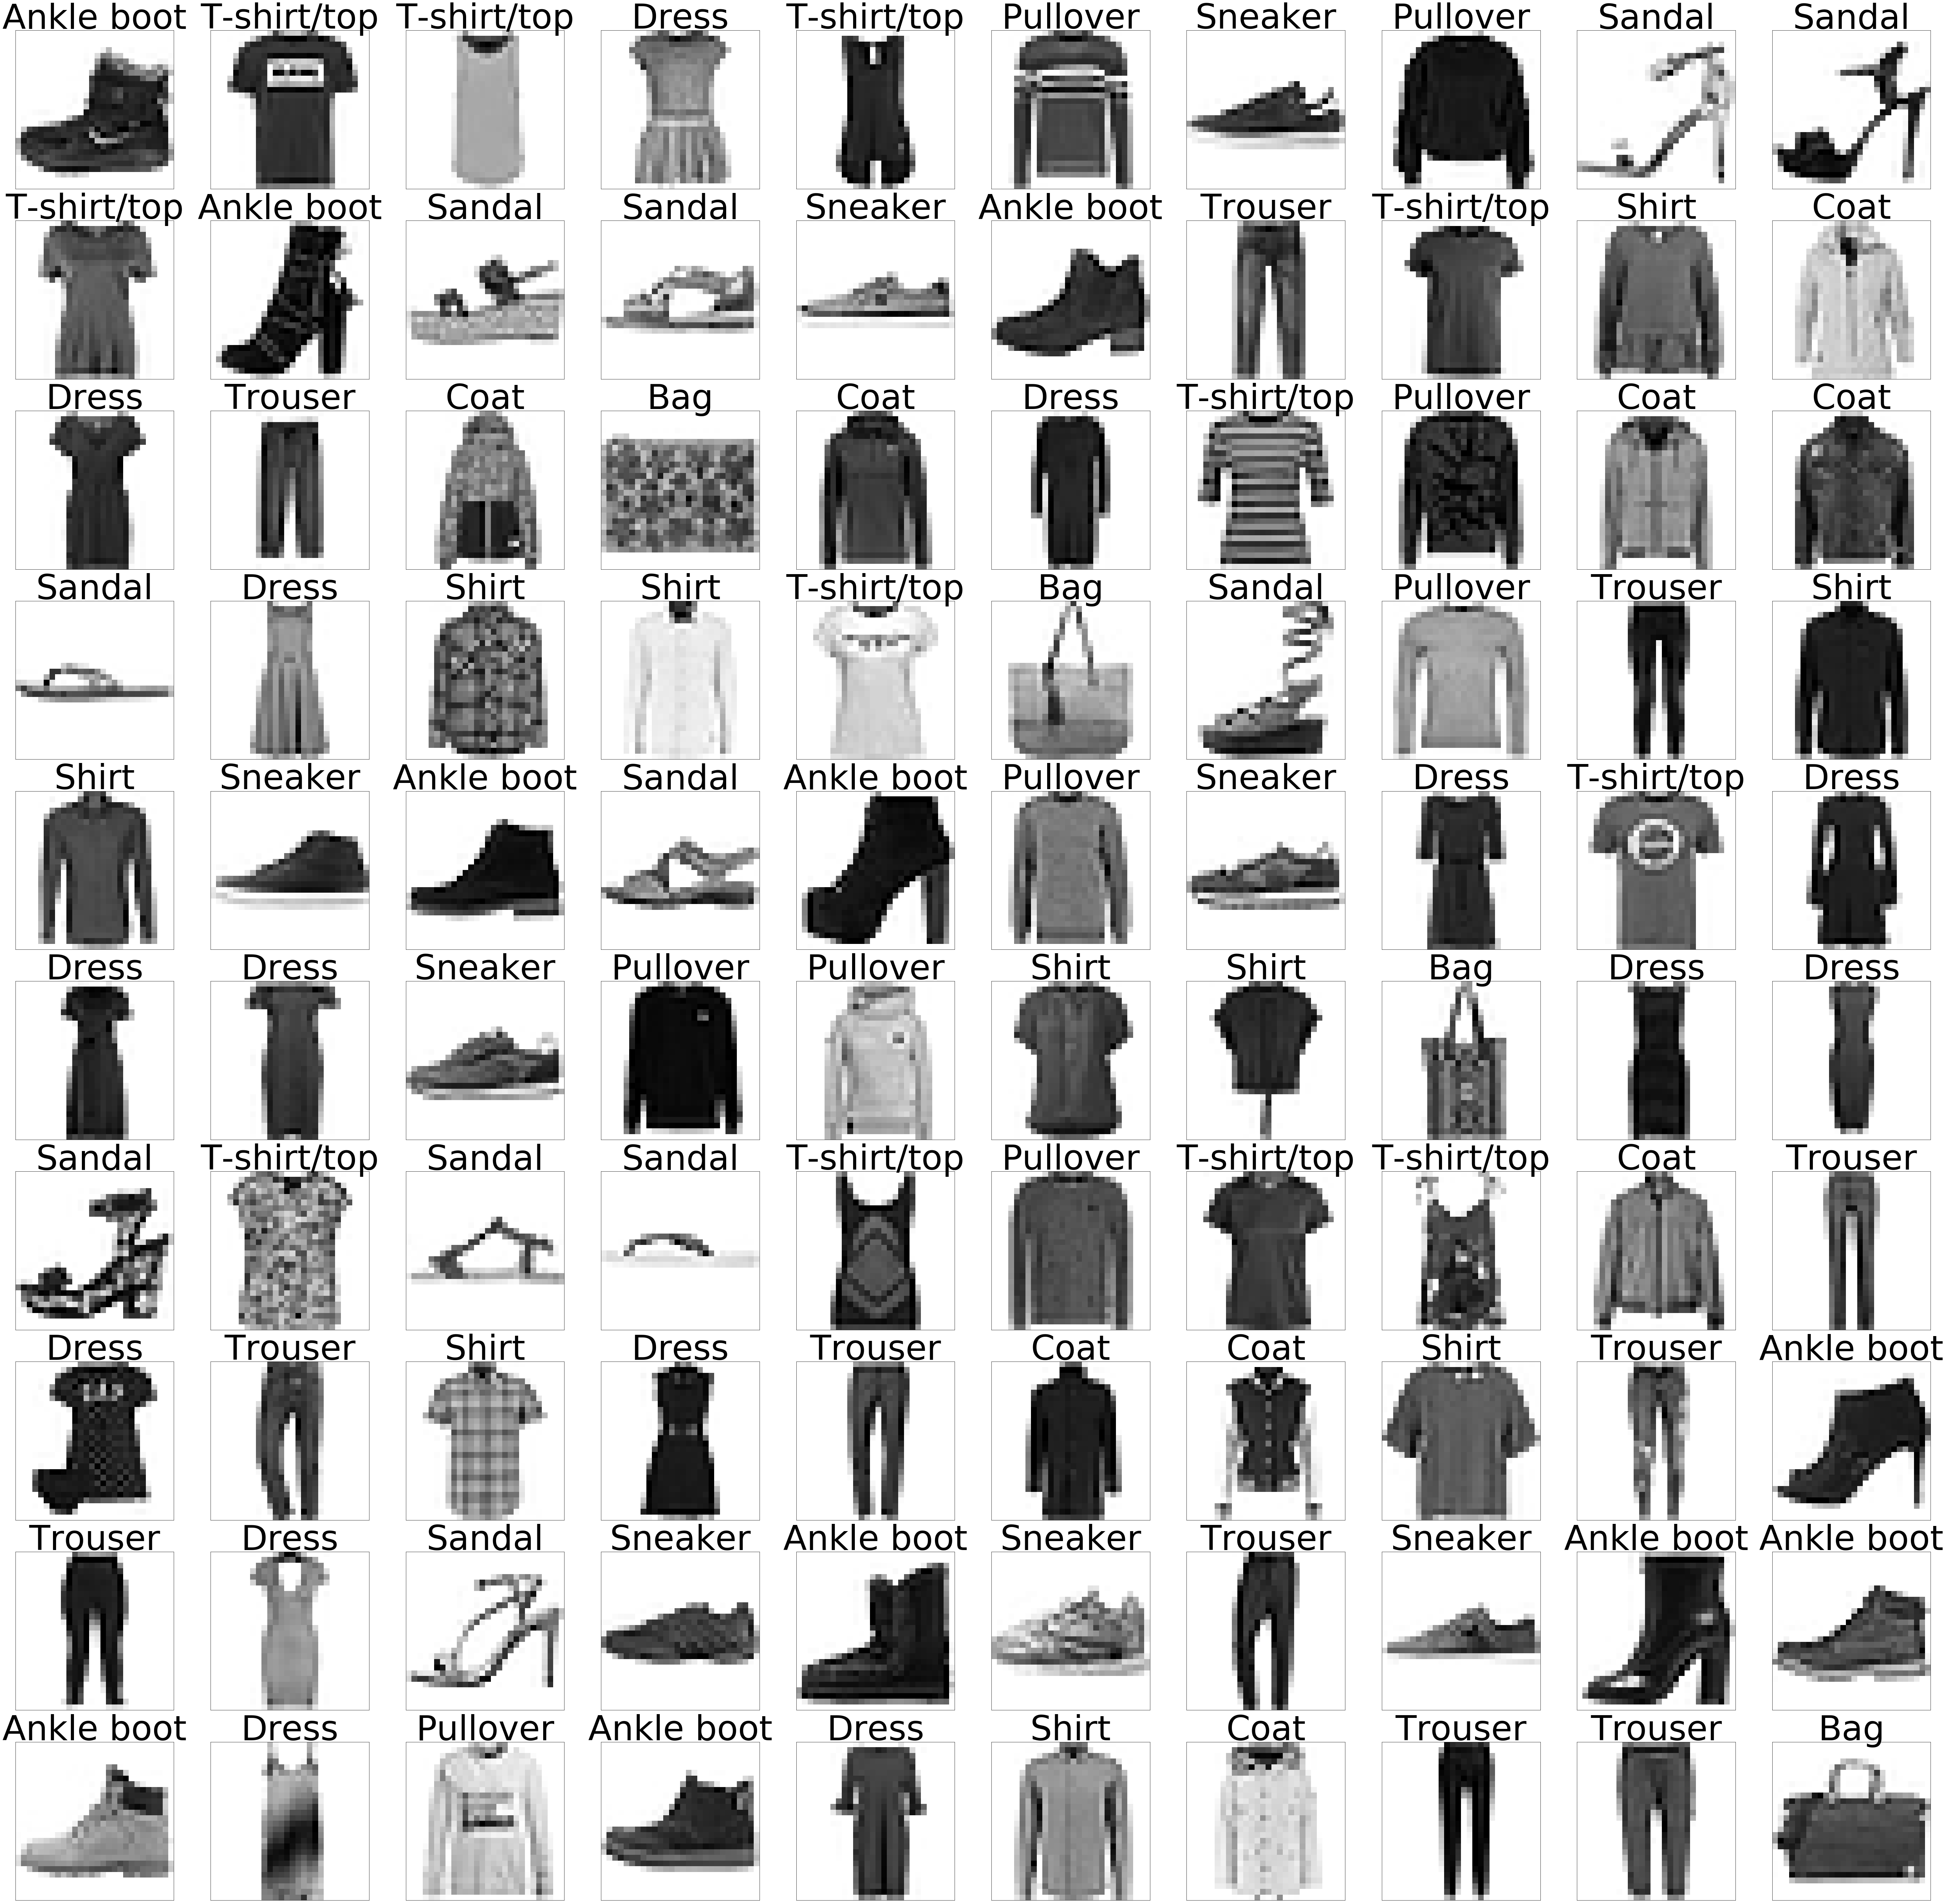

In [3]:
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(100,100))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(fashion_mnist[y_train[i]], fontsize=100)
plt.show()

In [4]:
img_rows, img_cols = x_train.shape[1:]

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
784*512, 785*512

(401408, 401920)

In [7]:
512*10, 513*10

(5120, 5130)

In [8]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


train data의 1/3을 validataion set으로 사용, batch는 따로 설정하지 않으면 기본으로 32

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 13s 320us/sample - loss: 0.5262 - acc: 0.8156 - val_loss: 0.4267 - val_acc: 0.8485
Epoch 2/10
40199/40199 [==============================] - 13s 322us/sample - loss: 0.3888 - acc: 0.8605 - val_loss: 0.3736 - val_acc: 0.8689
Epoch 3/10
40199/40199 [==============================] - 10s 249us/sample - loss: 0.3477 - acc: 0.8736 - val_loss: 0.3522 - val_acc: 0.8735
Epoch 4/10
40199/40199 [==============================] - 9s 227us/sample - loss: 0.3158 - acc: 0.8841 - val_loss: 0.3351 - val_acc: 0.8784
Epoch 5/10
40199/40199 [==============================] - 12s 292us/sample - loss: 0.2931 - acc: 0.8922 - val_loss: 0.3269 - val_acc: 0.8851
Epoch 6/10
40199/40199 [==============================] - 11s 267us/sample - loss: 0.2772 - acc: 0.8976 - val_loss: 0.3473 - val_acc: 0.8710
Epoch 7/10
40199/40199 [==============================] - 12s 293us/sample - loss: 0.2619 - acc: 0.9035 -

train set acc이 올라가면서 test set acc이 같이 올라가야 하는데 test set acc만 떨어지는 부분이 overfit

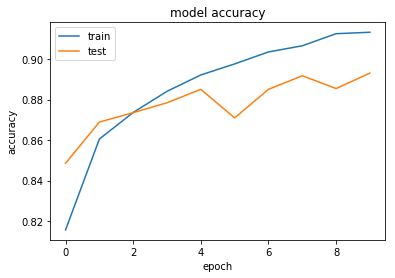

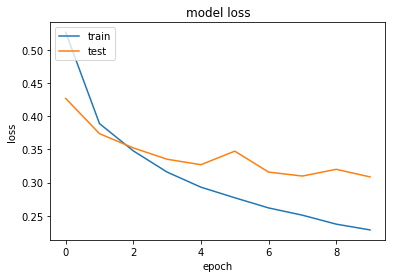

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

입력값을 주고 predict 함수를 통해 결과를 inference 할 수 있음

reshape이 필요한데, train 시킬 때 batch를 위하여 삼차원으로 맨 앞 차원을 비워둠, 이것을 1*28*28로 만들려면 reshape을 다시 해 주어야

Pullover


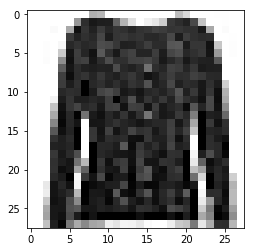

In [12]:
testID = 89
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(x_test[testID], cmap=plt.cm.binary)
out = model.predict(x_test[testID].reshape(1,img_rows, img_cols))
print(fashion_mnist[np.argmax(out)])

out에 열 개의 수가 있는데 모두 합치면 1, 열 개의 카테고리 중 가장 높은 값이 정답 category

In [13]:
out

array([[1.20127395e-01, 4.05528233e-04, 6.21871352e-01, 1.41676422e-03,
        1.36511214e-02, 1.45728018e-06, 2.19812676e-01, 7.77548166e-07,
        2.27099005e-02, 3.01339833e-06]], dtype=float32)

10개의 수 합치면?

In [14]:
np.sum(out)

1.0

가장 큰 값 출력

In [15]:
np.argmax(out)

2

fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
                
index 2에 해당하는 카테고리는 Pullover!

-----------------
model의 weights를 저장 해서 다시 사용 할 수 있음

.h5를 반드시 써 주는 것이 규칙

In [16]:
model.save_weights('fashion_mnist_weights.h5')
model.load_weights('fashion_mnist_weights.h5')